In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection, preprocessing
import seaborn as sns
import xgboost as xgb
import datetime

train = pd.read_csv("input/train.csv.zip", compression="zip", delimiter=",")
test = pd.read_csv("input/test.csv.zip", compression="zip", delimiter=",")
macro = pd.read_csv("input/macro.csv.zip", compression="zip", delimiter=",")

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


height has been deprecated.



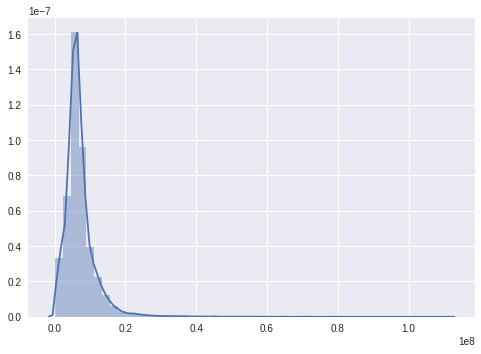

In [2]:
sns.distplot(train["price_doc"].values)

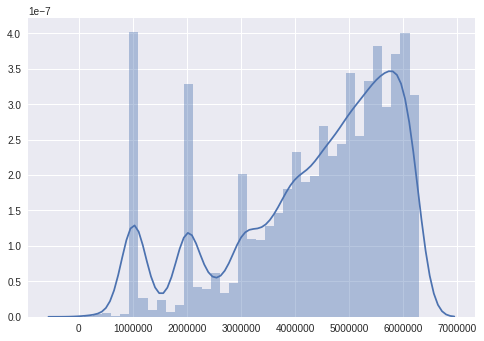

In [3]:
sns.distplot(train[train["price_doc"] <= 6283459]["price_doc"].values)

In [4]:
max(train["price_doc"])

111111112

In [5]:
min(train["price_doc"])

100000

In [6]:
np.mean(train["price_doc"])

7123035.2777394904

In [7]:
train["timestamp"].apply( lambda x: str(x)[:4]).unique()

array(['2011', '2012', '2013', '2014', '2015'], dtype=object)

In [8]:
train["timestamp"] = pd.to_datetime(train["timestamp"])
train["timestamp"].apply( lambda x: str(x)[:4]).unique()

array(['2011', '2012', '2013', '2014', '2015'], dtype=object)

In [9]:
train["day"] = train["timestamp"].dt.day

In [10]:
train["month"] = train["timestamp"].dt.month

In [11]:
train["year"] = train["timestamp"].dt.year
train["year"].unique()

array([2011, 2012, 2013, 2014, 2015])

In [12]:
train['yearmonth'] = train['timestamp'].apply(lambda x: str(x)[:4]+str(x)[5:7])

In [13]:
test["timestamp"] = pd.to_datetime(test["timestamp"])
test["year"], test["month"], test["day"] = test["timestamp"].dt.year,test["timestamp"].dt.month,test["timestamp"].dt.day
test['yearmonth'] = test['timestamp'].apply(lambda x: str(x)[:4]+str(x)[5:7])

In [14]:
train["count"] = 1

In [15]:
count_year_train = train.groupby("year").count().reset_index()

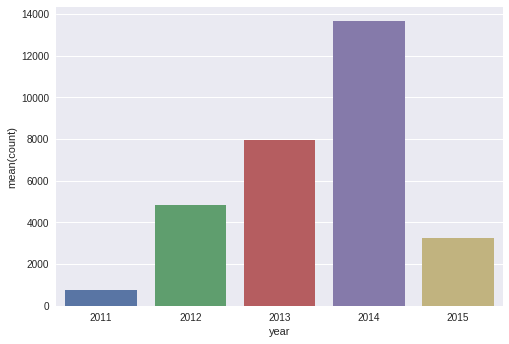

In [17]:
sns.barplot(count_year_train["year"], count_year_train["count"])

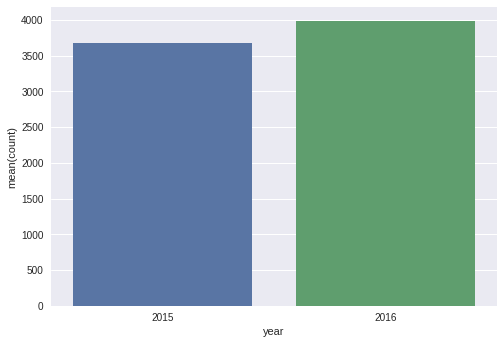

In [18]:
test["count"] = 1
count_year_test = test.groupby("year").count().reset_index()
sns.barplot(count_year_test["year"], count_year_test["count"])

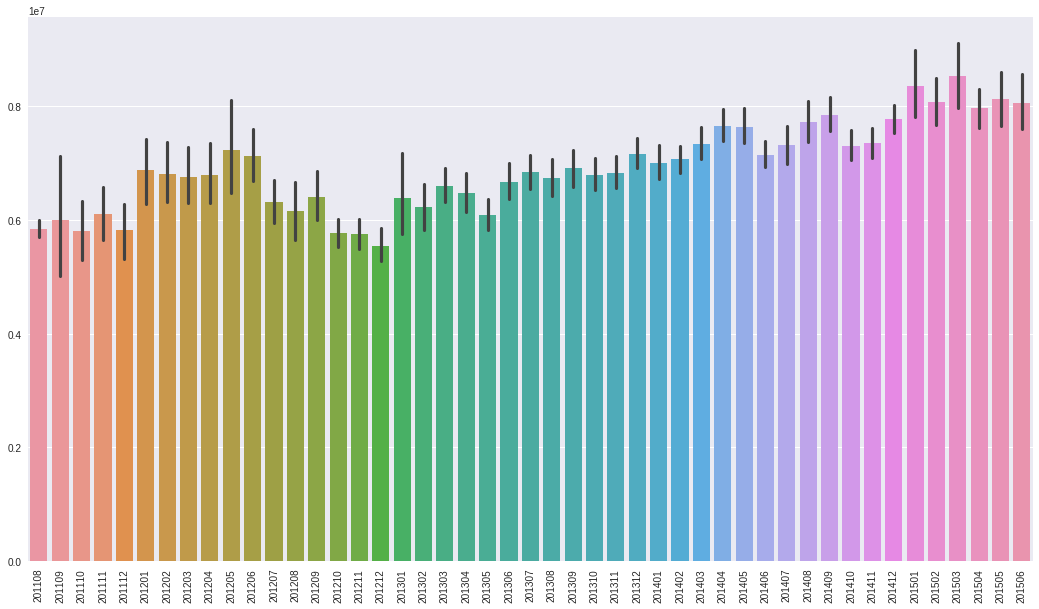

In [19]:
train.groupby("yearmonth").aggregate(np.mean).reset_index()
plt.figure(figsize= (18,10))
plt.xticks(rotation="vertical")
sns.barplot(train["yearmonth"].values, train["price_doc"].values)

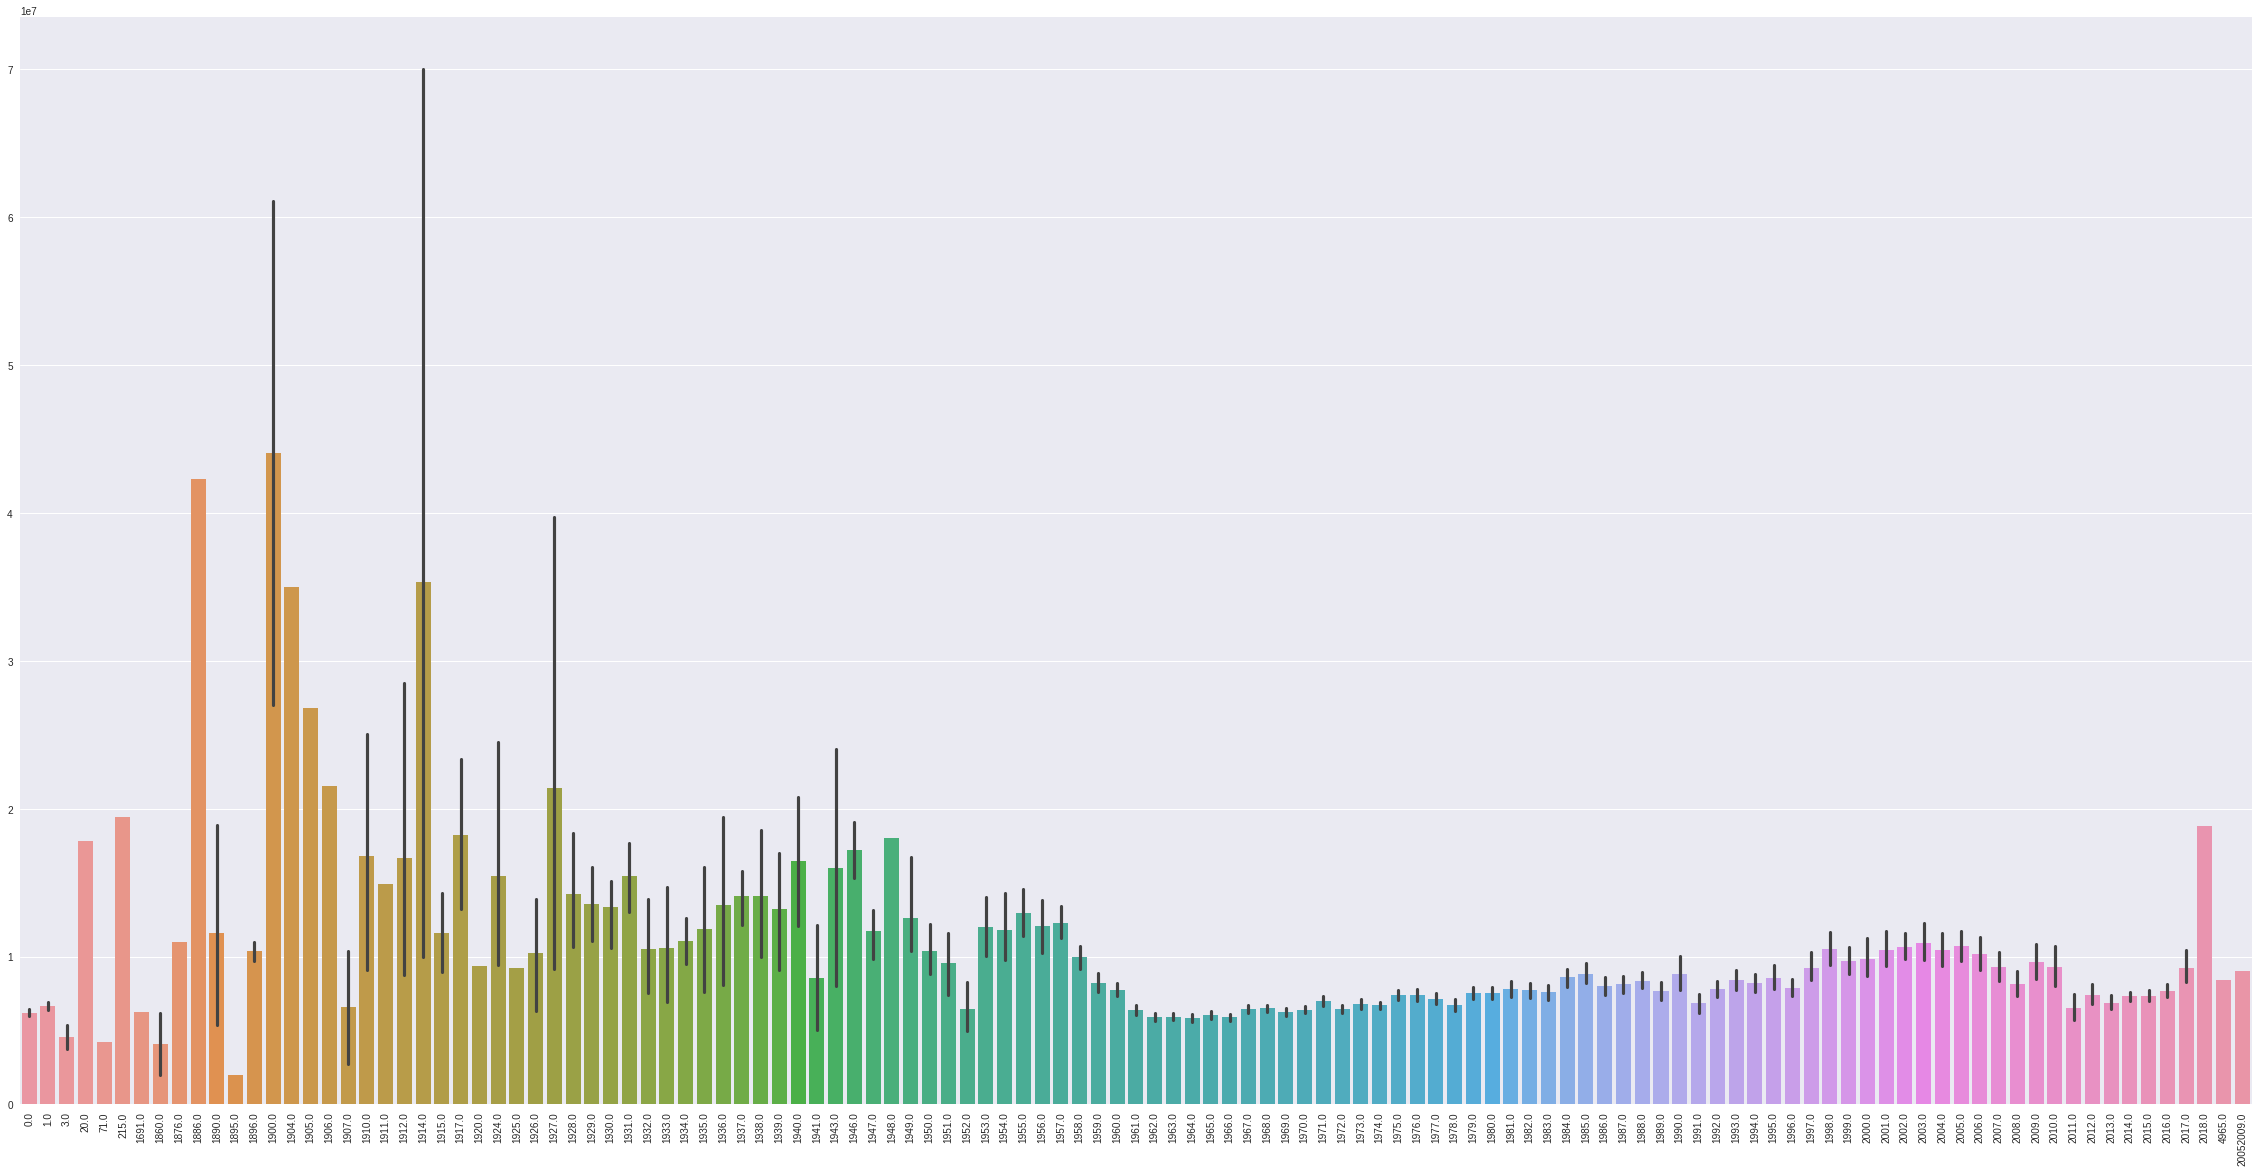

In [20]:
train.groupby("build_year").aggregate(np.mean).reset_index()
plt.figure(figsize= (40,20))
plt.xticks(rotation="vertical")
sns.barplot(train["build_year"].values, train["price_doc"].values)

### As we can see in the plot above, there are many incorrect values in the build year feature

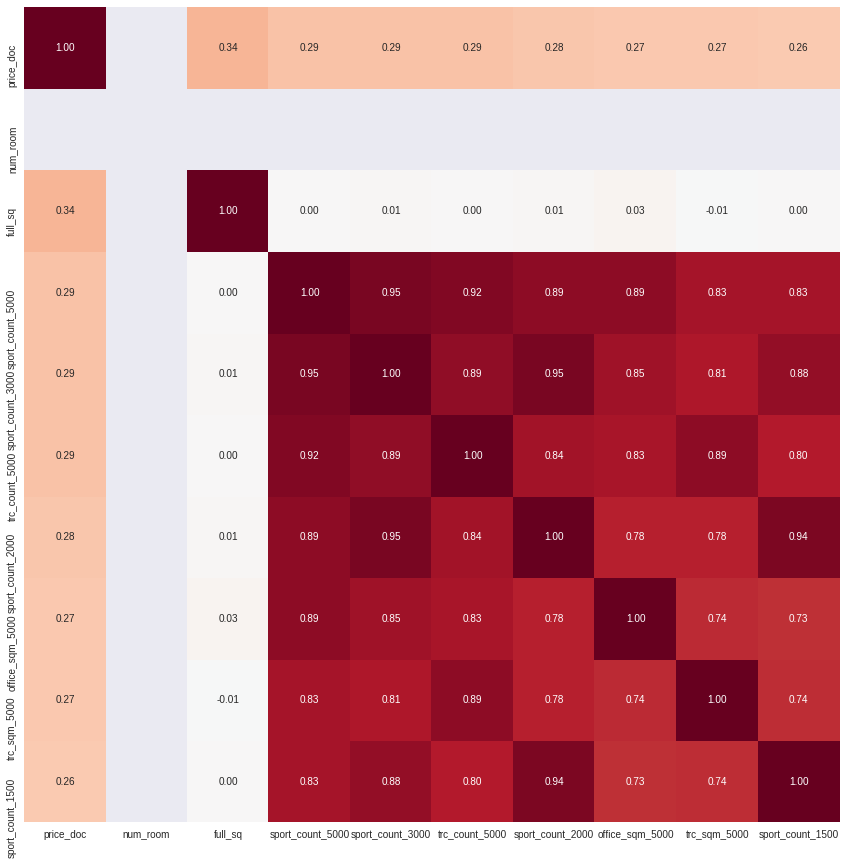

In [21]:
corr = train.corr()

cols = corr.nlargest(10, "price_doc")["price_doc"].index

cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

### This is the correlation matrix 

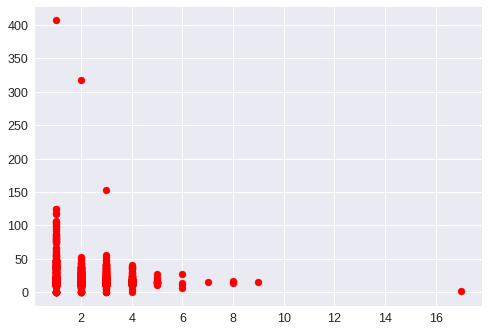

In [22]:
small_train = train.dropna()
square_per_room = small_train["life_sq"]/small_train["num_room"]

plt.scatter(small_train["num_room"],square_per_room,color="red")

### NEXT is based on
https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
http://machinelearningmastery.com/an-introduction-to-feature-selection/
http://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/
https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/
##### Further reading
http://www.kdnuggets.com/2017/05/learn-machine-learning-10-days.html?utm_content=buffer46c1d&utm_medium=social&utm_source=facebook.com&utm_campaign=buffer
http://www.kdnuggets.com/2017/03/6-business-concepts-data-science-unicorn.html?utm_content=buffer7e2af&utm_medium=social&utm_source=facebook.com&utm_campaign=buffer